In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df = pd.read_csv('/content/data.csv')

In [4]:
df.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0


In [5]:
df.isnull().sum()

,0
ad_id,0
reporting_start,0
reporting_end,0
campaign_id,0
fb_campaign_id,0
age,0
gender,0
interest1,0
interest2,0
interest3,0


In [6]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 761 entries, 0 to 760
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                761 non-null    int64  
 1   reporting_start      761 non-null    object 
 2   reporting_end        761 non-null    object 
 3   campaign_id          761 non-null    object 
 4   fb_campaign_id       761 non-null    object 
 5   age                  761 non-null    object 
 6   gender               761 non-null    object 
 7   interest1            761 non-null    int64  
 8   interest2            761 non-null    int64  
 9   interest3            761 non-null    int64  
 10  impressions          761 non-null    float64
 11  clicks               761 non-null    int64  
 12  spent                761 non-null    float64
 13  total_conversion     761 non-null    float64
 14  approved_conversion  761 non-null    float64
dtypes: float64(4), int64(5), object(6)
memory usa

In [7]:
df.describe()

,ad_id,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
count,7.610000e+02,761.000000,761.000000,761.000000,7.610000e+02,761.000000,761.000000,761.000000,761.000000
mean,8.956389e+05,25.473062,28.977661,28.984231,1.031716e+05,15.340342,25.782181,2.161629,0.768725
std,1.670937e+05,15.508898,15.607548,15.604816,2.462644e+05,32.715738,57.622334,4.062201,1.656445
min,7.087460e+05,2.000000,3.000000,3.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.480860e+05,16.000000,19.000000,19.000000,3.149000e+03,0.000000,0.000000,1.000000,0.000000
50%,7.811750e+05,22.000000,26.000000,25.000000,1.219300e+04,3.000000,3.580000,1.000000,0.000000
75%,1.121184e+06,29.000000,33.000000,33.000000,8.597000e+04,14.000000,23.210000,2.000000,1.000000
max,1.121593e+06,66.000000,72.000000,72.000000,3.052003e+06,340.000000,639.949998,60.000000,21.000000


In [8]:
Index=np.arange(1,762)
df.set_index(Index,inplace=True)

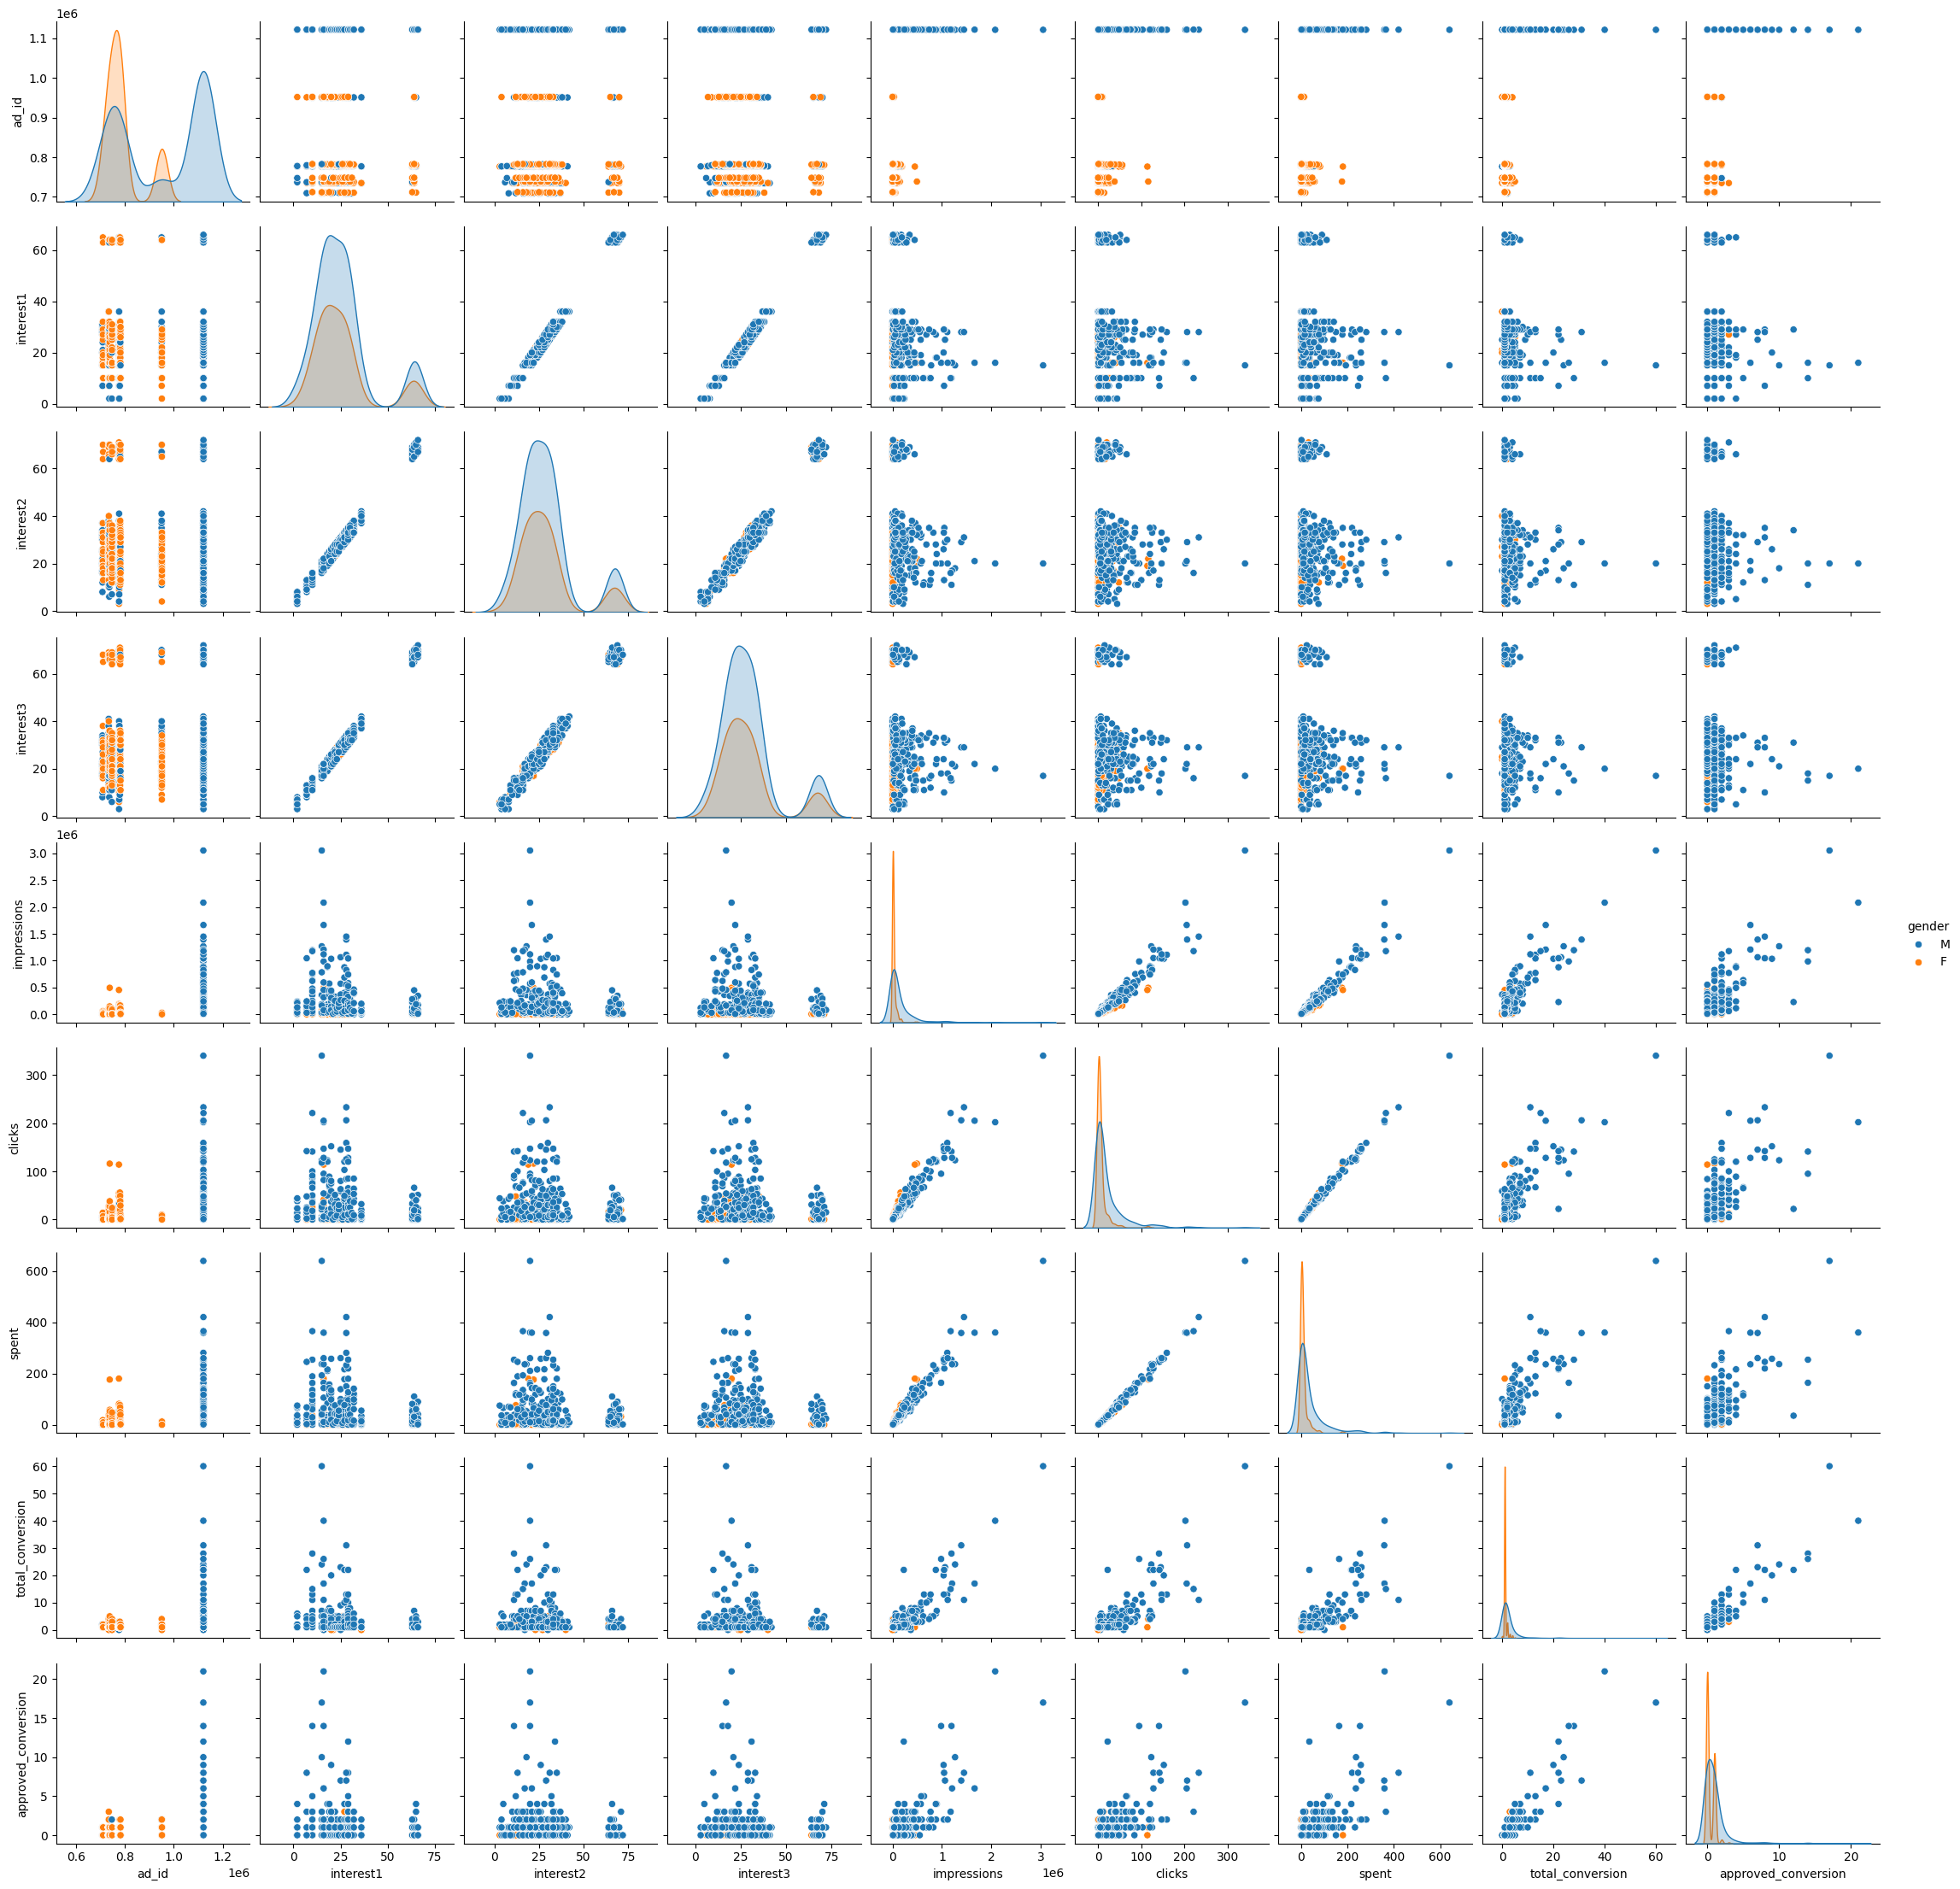

In [9]:
sb.pairplot(df,hue='gender')

Text(0.5, 1.0, 'Targetted Age in the Ad Campaign')

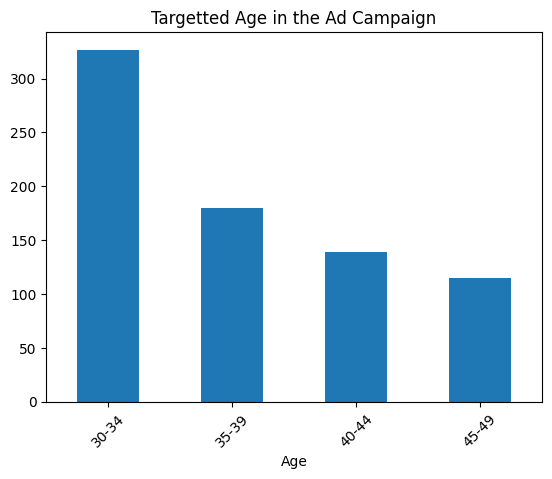

In [10]:
df.age.value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.xlabel('Age')
plt.title('Targetted Age in the Ad Campaign')

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'ad_id'),
  Text(1.5, 0, 'interest1'),
  Text(2.5, 0, 'interest2'),
  Text(3.5, 0, 'interest3'),
  Text(4.5, 0, 'impressions'),
  Text(5.5, 0, 'clicks'),
  Text(6.5, 0, 'spent'),
  Text(7.5, 0, 'total_conversion'),
  Text(8.5, 0, 'approved_conversion')])

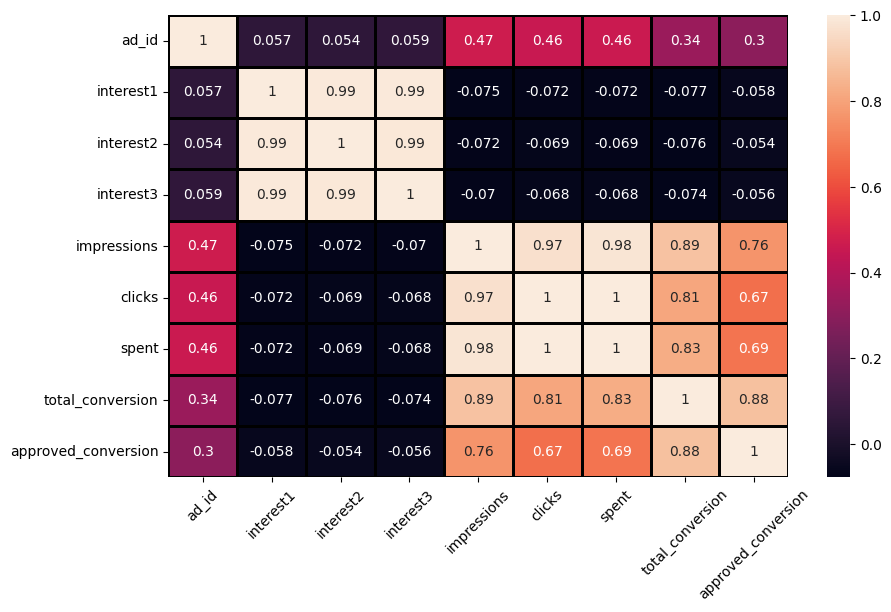

In [15]:
ax=plt.figure(figsize=(10,6))
corr=df.drop(['reporting_start', 'reporting_end', 'age', 'gender', 'campaign_id', 'fb_campaign_id'], axis=1).corr()
sb.heatmap(corr,linewidths=1,linecolor='black',annot=True)
plt.xticks(rotation=45)

In [16]:
df.gender.value_counts()

,count
gender,
M,486
F,275


In [17]:
df[df['spent'] ==df['spent'].max()]

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
526,1121100,29/08/2017,29/08/2017,1178,144532,30-34,M,15,20,17,3052003.0,340,639.949998,60.0,17.0


In [18]:
df[df['clicks'] ==df['clicks'].max()]

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
526,1121100,29/08/2017,29/08/2017,1178,144532,30-34,M,15,20,17,3052003.0,340,639.949998,60.0,17.0


In [19]:
tc=(df.groupby(['campaign_id'])).total_conversion.sum()
tc

,total_conversion
campaign_id,
1178,1050.0
916,58.0
936,537.0


In [20]:
ac=(df.groupby(['campaign_id'])).approved_conversion.sum()
ac

,approved_conversion
campaign_id,
1178,378.0
916,24.0
936,183.0


In [21]:
percent_approved = (ac/tc)*100
percent_approved

,0
campaign_id,
1178,36.000000
916,41.379310
936,34.078212


In [22]:
(df.groupby(['campaign_id'])).spent.sum()

,spent
campaign_id,
1178,16577.159998
916,149.710001
936,2893.369999


In [23]:
(df.groupby(['campaign_id'])).impressions.sum()

,impressions
campaign_id,
1178,69902476.0
916,482925.0
936,8128187.0


In [24]:
(df.groupby(['campaign_id'])).clicks.sum()

,clicks
campaign_id,
1178,9577
916,113
936,1984


In [25]:
X=df[['total_conversion','approved_conversion']]
y=df[['spent']]

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [32]:
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

In [33]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,pred)
r2

0.5584405733985245